In [ ]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm

#Exploratory Data Analysis

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/train-small.csv')
valid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/valid-small.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/test.csv')

In [ ]:
train_df

Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0    00008270_015.png            0             0              0      0   
1    00029855_001.png            1             0              0      0   
2    00001297_000.png            0             0              0      0   
3    00012359_002.png            0             0              0      0   
4    00017951_001.png            0             0              0      0   
..                ...          ...           ...            ...    ...   
995  00015869_010.png            0             0              0      0   
996  00020113_005.png            0             0              0      0   
997  00019939_000.png            0             0              0      0   
998  00030496_000.png            0             0              0      0   
999  00012363_002.png            0             0              0      0   

     Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0           0          0         0       0             0     0       0   
1           1          0         0       0             1     0       0   
2           0          0         0       0             0     0       0   
3           0          0         0       0             0     0       0   
4           0          0         0       0             1     0       0   
..        ...        ...       ...     ...           ...   ...     ...   
995         0          0         0       0             0     0       0   
996         1          0         0       0             0     0       0   
997         0          0         0       0             0     0       0   
998         0          0         0       0             0     0       0   
999         0          0         0       0             0     0       0   

     PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0         8270                   0          0             0  
1        29855                   0          0             0  
2         1297                   1          0             0  
3        12359                   0          0             0  
4        17951                   0          0             0  
..         ...                 ...        ...           ...  
995      15869                   0          0             0  
996      20113                   0          0             0  
997      19939                   0          0             0  
998      30496                   0          0             0  
999      12363                   0          0             0  

[1000 rows x 16 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [ ]:
print(f'There are a total of {train_df.PatientId.value_counts().shape[0]} unique patients out of {train_df.PatientId.count()} patient IDs')

There are a total of 928 unique patients out of 1000 patient IDs


In [ ]:
train_df.columns

Index(['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass',
       'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

In [ ]:
diseases=train_df.drop(['Image','PatientId'],axis=1)
diseases.columns

Index(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule',
       'Pleural_Thickening', 'Pneumonia', 'Pneumothorax'],
      dtype='object')

In [ ]:
print(f'There are a total of {len(diseases.columns)} that include {list(diseases.columns)}')

There are a total of 14 that include ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [ ]:
for column in diseases.columns:
  count = diseases[column].value_counts().get(1)
  print(f"Column {column}: {count}")

Column Atelectasis: 106
Column Cardiomegaly: 20
Column Consolidation: 33
Column Edema: 16
Column Effusion: 128
Column Emphysema: 13
Column Fibrosis: 14
Column Hernia: 2
Column Infiltration: 175
Column Mass: 45
Column Nodule: 54
Column Pleural_Thickening: 21
Column Pneumonia: 10
Column Pneumothorax: 38


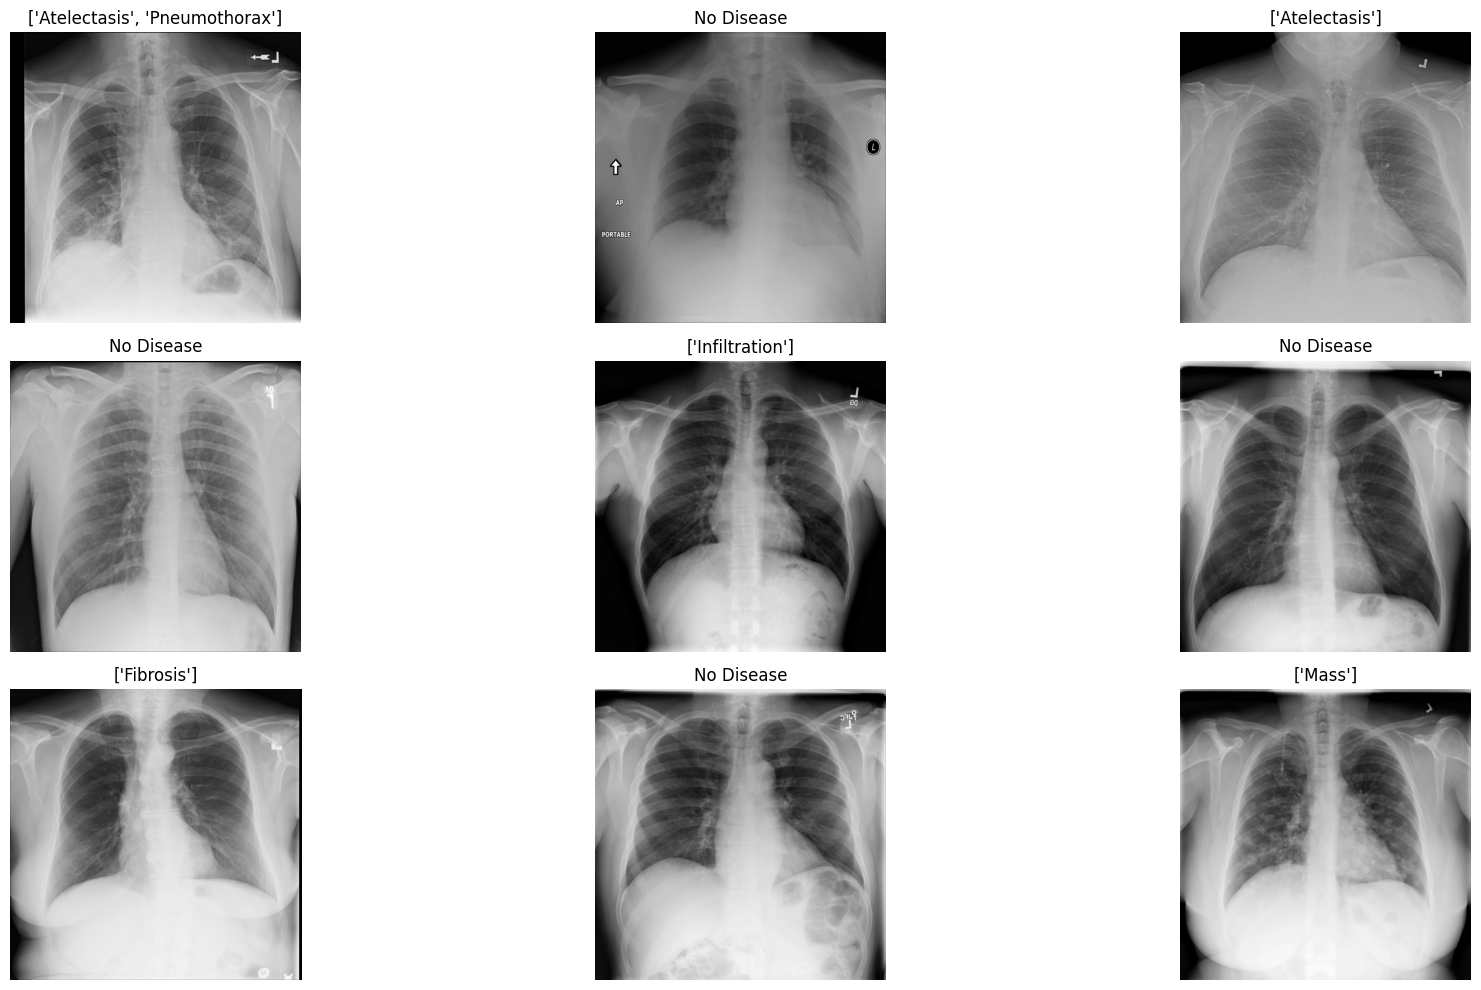

In [ ]:
sample=train_df.sample(9)

image_dir='/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/images'

plt.figure(figsize=(20,10))
counter=0

for index, row in sample.iterrows():
    plt.subplot(3, 3, counter + 1)
    img = plt.imread(os.path.join(image_dir,row['Image']))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    counter+=1
    d=row[row==1].index.to_list()
    if not d:
      plt.title('No Disease')
    else:
      plt.title(d)


plt.tight_layout()
plt.show()

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


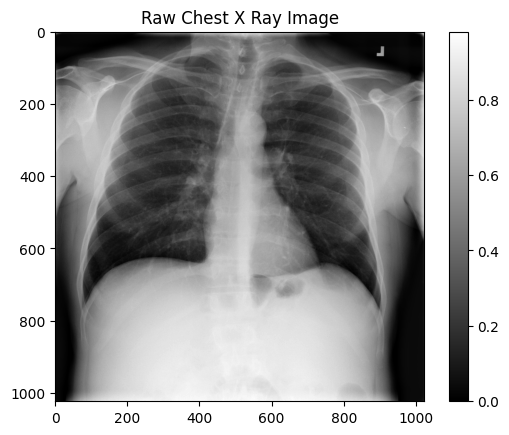

In [ ]:
sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(image_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

<ipython-input-12-5170b570a150>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

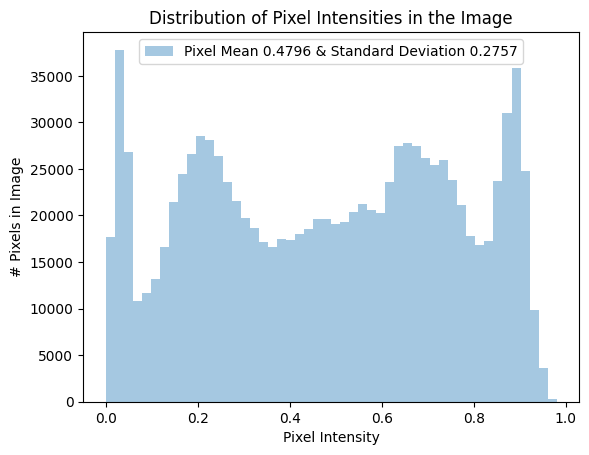

In [ ]:
sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
df=train_df.drop(['PatientId','Image'],axis=1)
reversed_df = df.apply(lambda row: row.index[row == 1].tolist(), axis=1)
reversed_df = reversed_df.apply(lambda x: x if x else ['No Disease'])
reversed_df = reversed_df.reset_index(name='Diseases')
reversed_df.drop('index',axis=1,inplace=True)
reversed_df

Diseases
0                             [No Disease]
1    [Atelectasis, Effusion, Infiltration]
2                     [Pleural_Thickening]
3                             [No Disease]
4                           [Infiltration]
..                                     ...
995                           [No Disease]
996                             [Effusion]
997                           [No Disease]
998                           [No Disease]
999                           [No Disease]

[1000 rows x 1 columns]

In [ ]:
df=train_df[['PatientId','Image']]
df = pd.concat([df, reversed_df], axis=1)
df

PatientId             Image                               Diseases
0         8270  00008270_015.png                           [No Disease]
1        29855  00029855_001.png  [Atelectasis, Effusion, Infiltration]
2         1297  00001297_000.png                   [Pleural_Thickening]
3        12359  00012359_002.png                           [No Disease]
4        17951  00017951_001.png                         [Infiltration]
..         ...               ...                                    ...
995      15869  00015869_010.png                           [No Disease]
996      20113  00020113_005.png                             [Effusion]
997      19939  00019939_000.png                           [No Disease]
998      30496  00030496_000.png                           [No Disease]
999      12363  00012363_002.png                           [No Disease]

[1000 rows x 3 columns]

Text(0, 0.5, 'Count')

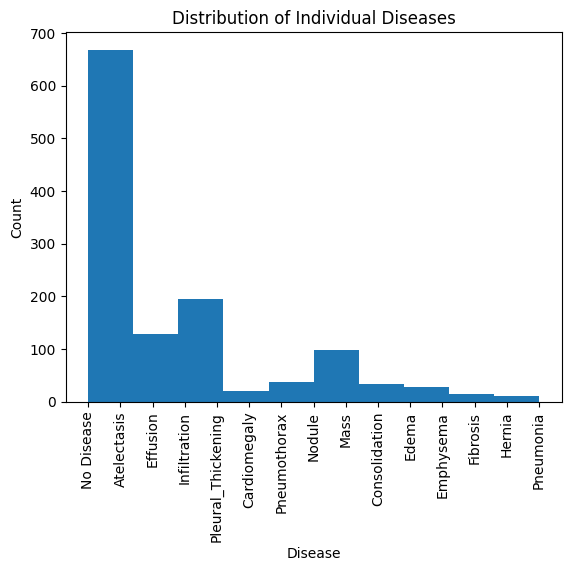

In [ ]:
df_exploded=df.explode('Diseases')

plt.hist(df_exploded.Diseases)
plt.xticks(rotation=90)
plt.title('Distribution of Individual Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')

image_dir='/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/images'
x=[]
for image in tqdm(df.Image, desc="Reading Images"):  # Wrap the loop with tqdm
  img=plt.imread(os.path.join(image_dir,image))
  img= cv2.resize(img, (100, 100))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img=img/255
  x.append(img)

#Image Preprocessing



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w=320, target_h=320):

  print('Getting train generator')

  image_generator=ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization=True)

  generator=image_generator.flow_from_dataframe(
      dataframe=df,
      directory=image_dir,
      x_col=x_col,
      y_col=y_cols,
      class_mode='raw',
      batch_size=batch_size,
      shuffle=shuffle,
      seed=seed,
      target_size=(target_w,target_h))

  return generator

In [ ]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w=320, target_h=320):

  print(f"\nextracting {sample_size} train images to normalize validation and test datasets...")

  raw_train_generator=ImageDataGenerator().flow_from_dataframe(
      dataframe=train_df,
      directory=image_dir,
      x_col=x_col,
      y_col=y_cols,
      class_mode='raw',
      batch_size=sample_size,
      shuffle=True,
      seed=seed,
      target_size=(target_w,target_h))

  batch=raw_train_generator.__next__()
  data_sample=batch[0]

  image_generator=ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization=True)

  image_generator.fit(data_sample)

  print('Getting validation generator')

  valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

  print('Getting test generator')

  test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

  return valid_generator, test_generator

In [ ]:
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
              'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']
image_dir='/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/images'
train_generator=get_train_generator(train_df, image_dir, 'Image', labels)
valid_generator, test_generator= get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, "Image", labels)

Getting train generator
Found 1000 validated image filenames.

extracting 100 train images to normalize validation and test datasets...
Found 1000 validated image filenames.
Getting validation generator
Found 200 validated image filenames.
Getting test generator
Found 420 validated image filenames.


(-0.5, 319.5, 319.5, -0.5)

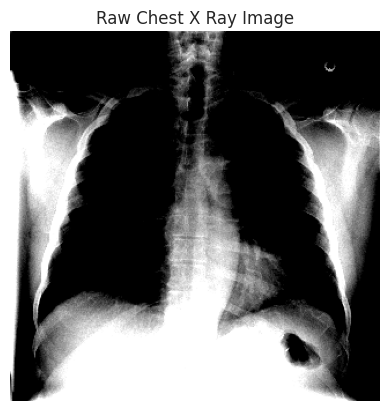

In [ ]:
sns.set_style('white')
generated_image,label=train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.title('Raw Chest X Ray Image')
plt.axis('off')

In [ ]:
print(generated_image.shape, generated_image[0].shape)
print(raw_image.shape)

(8, 320, 320, 3) (320, 320, 3)
(1024, 1024)


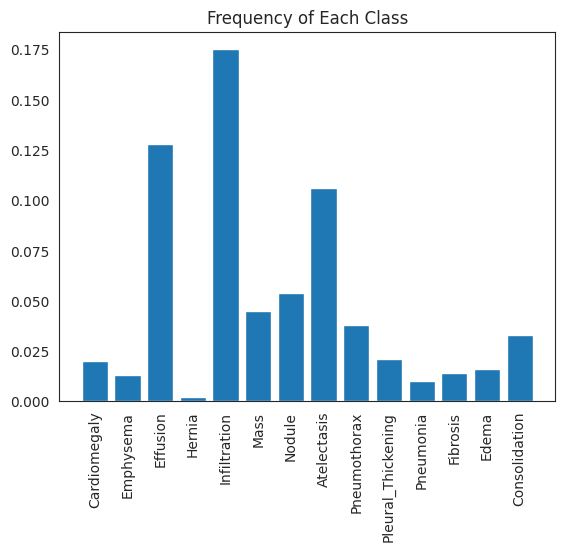

In [ ]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

#Computing Class Frequencies

for weighted loss as we have imbalanced data

In [ ]:
def compute_class_freqs(labels):

  N=labels.shape[0]

  positive_frequencies = np.sum(labels, axis=0)/N
  negative_frequencies = 1-positive_frequencies

  return positive_frequencies, negative_frequencies

In [ ]:
freq_pos, freq_neg=compute_class_freqs(train_generator.labels)
print('freq_pos')
print(freq_pos)
print('freq_neg')
print(freq_neg)

freq_pos
[0.02  0.013 0.128 0.002 0.175 0.045 0.054 0.106 0.038 0.021 0.01  0.014
 0.016 0.033]
freq_neg
[0.98  0.987 0.872 0.998 0.825 0.955 0.946 0.894 0.962 0.979 0.99  0.986
 0.984 0.967]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Cardiomegaly'),
  Text(1, 0, 'Emphysema'),
  Text(2, 0, 'Effusion'),
  Text(3, 0, 'Hernia'),
  Text(4, 0, 'Infiltration'),
  Text(5, 0, 'Mass'),
  Text(6, 0, 'Nodule'),
  Text(7, 0, 'Atelectasis'),
  Text(8, 0, 'Pneumothorax'),
  Text(9, 0, 'Pleural_Thickening'),
  Text(10, 0, 'Pneumonia'),
  Text(11, 0, 'Fibrosis'),
  Text(12, 0, 'Edema'),
  Text(13, 0, 'Consolidation')])

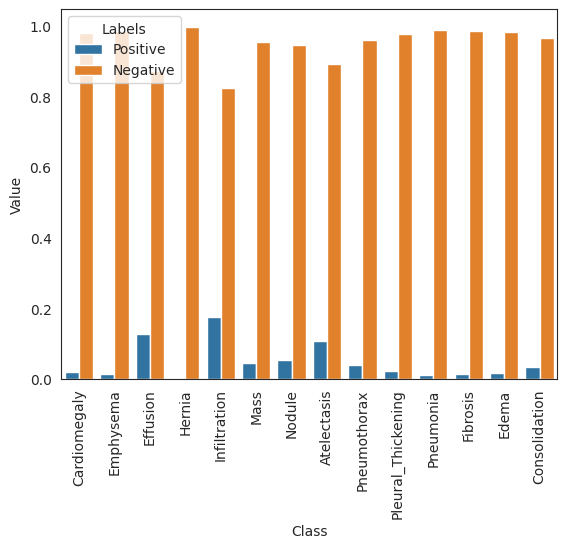

In [ ]:
data = pd.DataFrame({'Class': labels, 'Labels': 'Positive', 'Value': freq_pos})
data_neg = pd.DataFrame({'Class': labels, 'Labels': 'Negative', 'Value': freq_neg})
data = pd.concat([data, data_neg], ignore_index=True)

sns.barplot(x='Class', y='Value', hue='Labels', data=data)
plt.xticks(rotation=90)

In [ ]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Cardiomegaly'),
  Text(1, 0, 'Emphysema'),
  Text(2, 0, 'Effusion'),
  Text(3, 0, 'Hernia'),
  Text(4, 0, 'Infiltration'),
  Text(5, 0, 'Mass'),
  Text(6, 0, 'Nodule'),
  Text(7, 0, 'Atelectasis'),
  Text(8, 0, 'Pneumothorax'),
  Text(9, 0, 'Pleural_Thickening'),
  Text(10, 0, 'Pneumonia'),
  Text(11, 0, 'Fibrosis'),
  Text(12, 0, 'Edema'),
  Text(13, 0, 'Consolidation')])

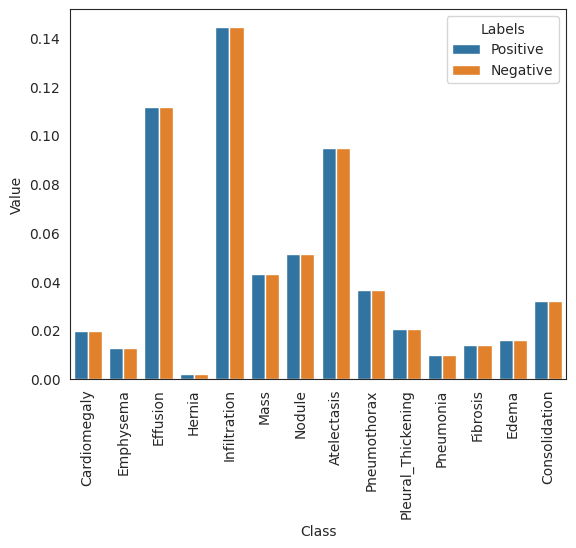

In [ ]:
data = pd.DataFrame({'Class': labels, 'Labels': 'Positive', 'Value': pos_contribution})
data_neg = pd.DataFrame({'Class': labels, 'Labels': 'Negative', 'Value': neg_contribution})
data = pd.concat([data, data_neg], ignore_index=True)

sns.barplot(x='Class', y='Value', hue='Labels', data=data)
plt.xticks(rotation=90)

#Weighted Loss

https://sigridcw.medium.com/balancing-the-scales-tackling-class-imbalance-in-ai-driven-diagnostics-part-2-d5c216c97b81

In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        loss = 0.0
        for i in range(len(pos_weights)):
            loss += - pos_weights[i] * K.mean(y_true[:, i] * K.log(y_pred[:, i] + epsilon)) \
                    - neg_weights[i] * K.mean((1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
        return loss
    return weighted_loss

In [ ]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):

    # Create them outside:
    neg_weight_tensor = tf.constant(neg_weights)  # Move outside
    pos_weight_tensor = tf.constant(pos_weights)  # Move outside

    def weighted_loss(y_true, y_pred):
        loss = 0.0
        for i in range(len(pos_weights)):
            loss += - pos_weights[i] * K.mean(y_true[:, i] * K.log(y_pred[:, i] + epsilon)) \
                    - neg_weights[i] * K.mean((1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
        return loss

    return weighted_loss



#DenseNet

Using a pre-trained DenseNet121 model

In [ ]:
class_pos = train_df.loc[:, labels].sum(axis=0)
class_pos

Cardiomegaly           20
Emphysema              13
Effusion              128
Hernia                  2
Infiltration          175
Mass                   45
Nodule                 54
Atelectasis           106
Pneumothorax           38
Pleural_Thickening     21
Pneumonia              10
Fibrosis               14
Edema                  16
Consolidation          33
dtype: int64

In [ ]:
class_neg = len(train_df) - class_pos
class_neg

Cardiomegaly          980
Emphysema             987
Effusion              872
Hernia                998
Infiltration          825
Mass                  955
Nodule                946
Atelectasis           894
Pneumothorax          962
Pleural_Thickening    979
Pneumonia             990
Fibrosis              986
Edema                 984
Consolidation         967
dtype: int64

In [ ]:
class_total = class_pos + class_neg

pos_weights = class_pos / class_total
neg_weights = class_neg / class_total
print("Got loss weights")

Got loss weights


In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import tensorflow as tf
#tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
base_model = DenseNet121(weights='/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/densenet.hdf5', include_top=False);
x=base_model.output
x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x)
predictions=Dense(len(labels),activation='sigmoid')(x)
model=Model(inputs=base_model.input,outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss=get_weighted_loss(neg_weights, pos_weights))

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, None, None, 64) │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, None, None, 64) │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, None, None, 64) │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None,     │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None,     │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None,     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 32) │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, None, None, 96) │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 7,051,854 (26.90 MB)

 Trainable params: 6,968,206 (26.58 MB)

 Non-trainable params: 83,648 (326.75 KB)

<ipython-input-31-bb7c5bce9cef>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  loss += - pos_weights[i] * K.mean(y_true[:, i] * K.log(y_pred[:, i] + epsilon)) \
<ipython-input-31-bb7c5bce9cef>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  - neg_weights[i] * K.mean((1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these argume

100/100 ━━━━━━━━━━━━━━━━━━━━ 640s 4s/step - loss: 0.8735 - val_loss: 5.8383


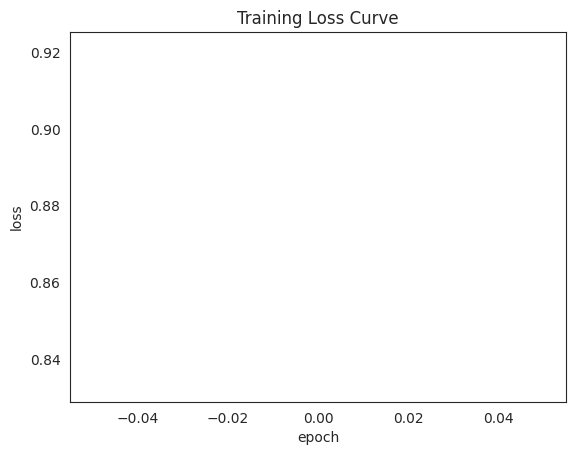

In [ ]:
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    steps_per_epoch=100,
                    validation_steps=25,
                    epochs = 1)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [ ]:
history.history

{'loss': [0.8770623207092285], 'val_loss': [5.838250160217285]}

In [ ]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Lung MRI Project/Lung MRI/pretrained_model.h5')

In [ ]:
predicted_vals = model.predict(test_generator, steps = len(test_generator))
predicted_vals.shape  # number of test samples x number of classes to predict

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step


(420, 14)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:, i]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.savefig('ROC.png')
    plt.show()
    return auc_roc_vals

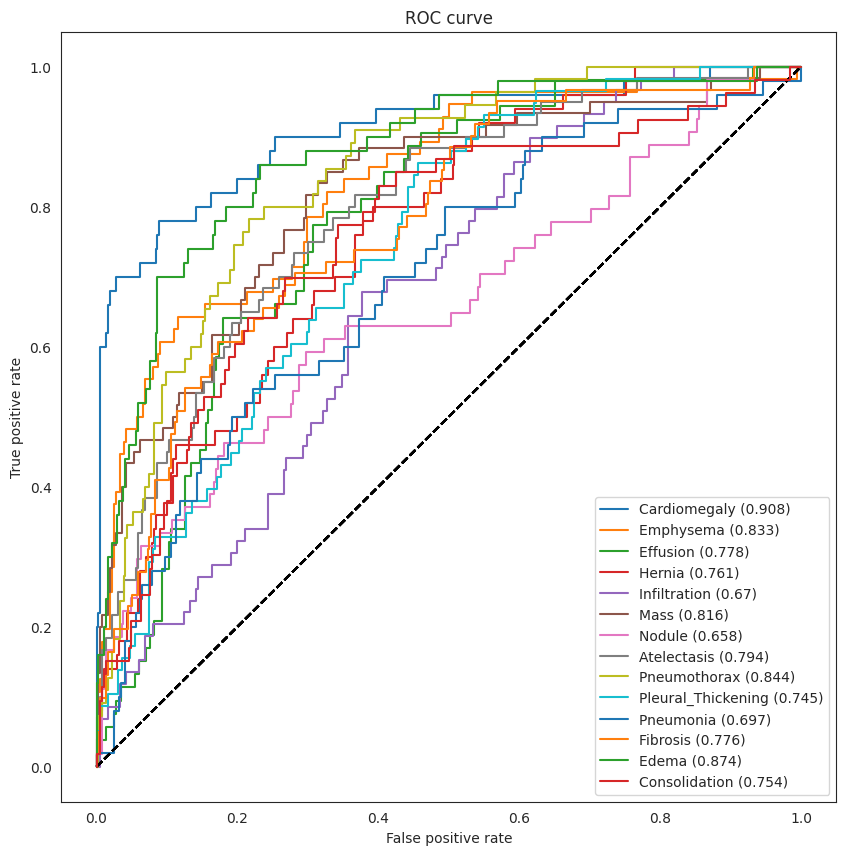

In [ ]:
auc_rocs = get_roc_curve(labels, predicted_vals, test_generator)

In [ ]:
print("areas under the curve : {} \n for all {} classes".format(auc_rocs,len(auc_rocs)))

areas under the curve : [0.9081621621621622, 0.8333006279434851, 0.7775949822631227, 0.761027027027027, 0.6704540119254425, 0.8156944444444444, 0.6578627808136005, 0.7941203703703703, 0.8439352428393525, 0.7445227662411887, 0.6974594594594594, 0.7764738115895702, 0.8742702702702703, 0.7544599249395918] 
 for all 14 classes


#Interpreting

In [ ]:
from tensorflow.keras.utils import load_img

In [ ]:
def load_image(path, df, preprocess=True, H = 320, W = 320):
    """Load and preprocess image."""
    x = load_img(path, target_size=(H, W))
    if preprocess:
        mean, std = get_mean_std_per_batch(df, H=H, W=W)
        x -= mean
        x /= std
        x = np.expand_dims(x, axis=0)
    return x

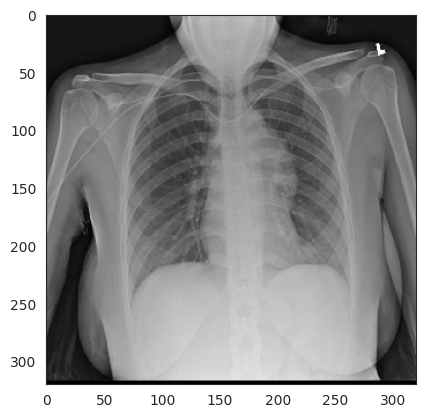

In [ ]:
im_path = image_dir + '/00025288_001.png'
x = load_image(im_path, train_df, preprocess=False)
plt.imshow(x, cmap = 'gray')
plt.show()

In [ ]:
def get_mean_std_per_batch(df, H=320, W=320):
    sample_data = []
    for idx, img in enumerate(df.sample(100)["Image"].values):
        path = image_dir + '/' + img
        sample_data.append(np.array(load_img(path, target_size=(H, W))))

    mean = np.mean(sample_data[0])
    std = np.std(sample_data[0])
    return mean, std

In [ ]:
mean, std = get_mean_std_per_batch(train_df)

In [ ]:
def load_image_normalize(path, mean, std, H=320, W=320):
    x = load_img(path, target_size=(H, W))
    x -= mean
    x /= std
    x = np.expand_dims(x, axis=0)
    return x

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


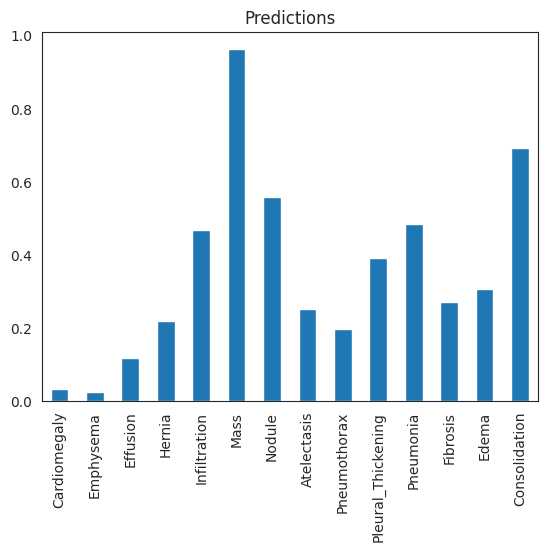

In [ ]:
#normalize and run the image through our model to get predictions
labels = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis',
              'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation']

processed_image = load_image_normalize(im_path, mean, std)
preds = model.predict(processed_image)
pred_df = pd.DataFrame(preds, columns = labels)
pred_df.loc[0, :].plot.bar()
plt.title("Predictions")
plt.savefig('predictions.png')
plt.show()

#GradCAM

In [ ]:
# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_dir + '/00016650_000.png')
resized = cv2.resize(orig, (320, 320))

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array


image = load_img((image_dir + '/00016650_000.png'), target_size=(320, 320))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = load_image_normalize((image_dir + '/00016650_000.png'), mean, std)

In [ ]:
# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


In [ ]:
print(preds)
print(i)

[[0.81900424 0.6263803  0.22996913 0.8201392  0.3202365  0.20715508
  0.3695187  0.13022001 0.15680376 0.6486603  0.17512456 0.8185361
  0.04277053 0.10026054]]
3


In [ ]:
labels[i]

'Hernia'

In [ ]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

In [ ]:
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

Shape of orig: (1024, 1024, 3)
Shape of heatmap: (1024, 1024, 3)
Shape of output: (1024, 1024, 3)


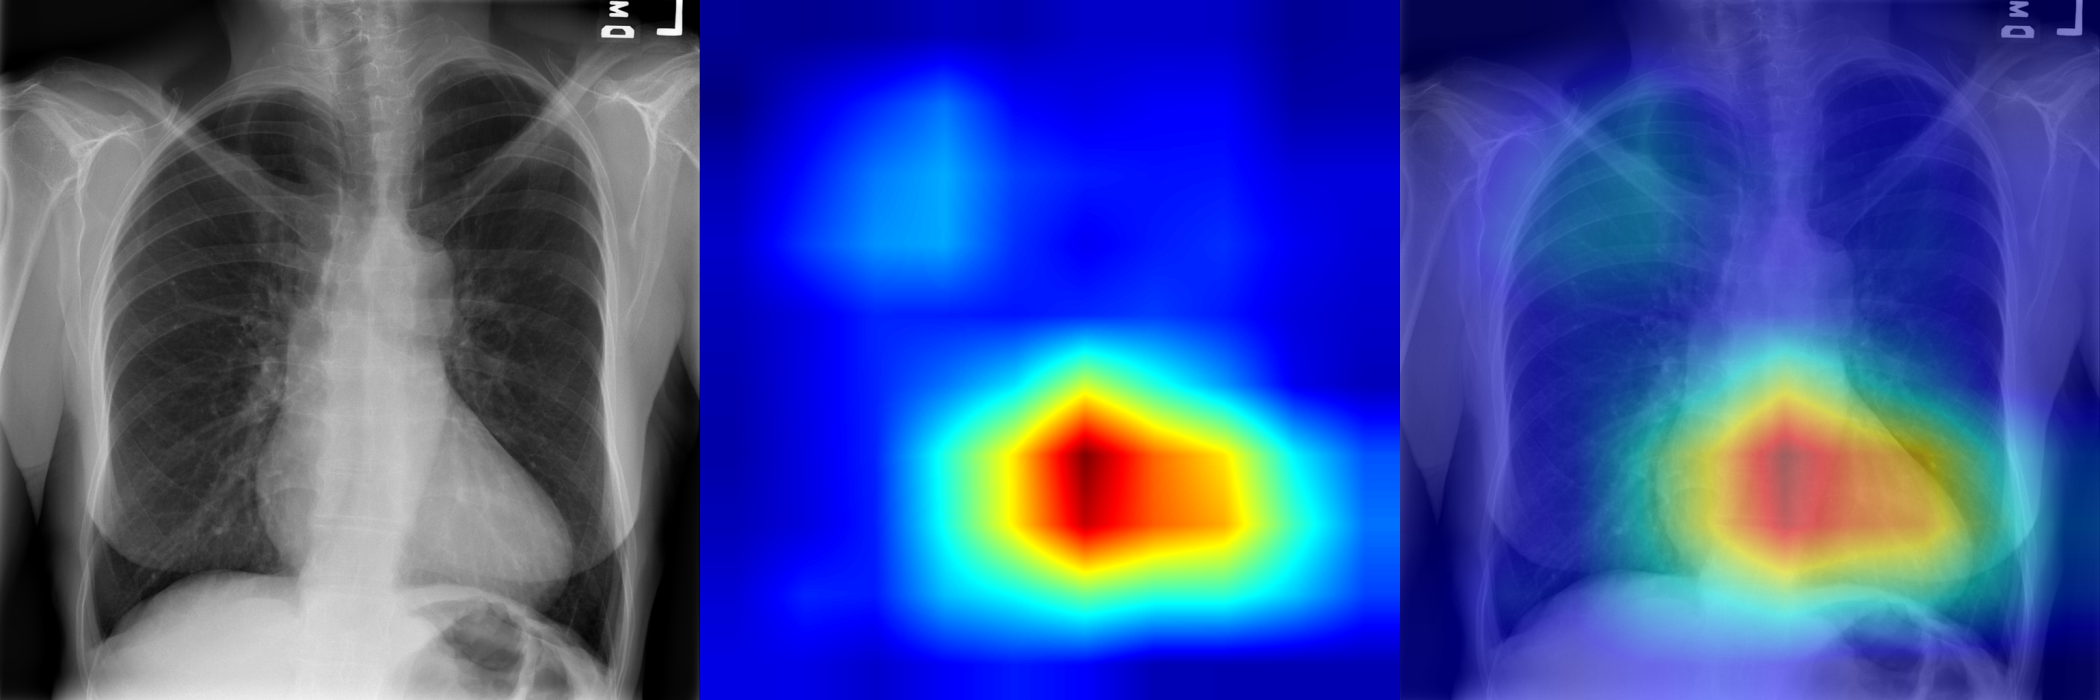

In [ ]:
!pip install imutils
import imutils
from google.colab.patches import cv2_imshow # Import the Colab patch

# Check shapes of arrays before stacking
print("Shape of orig:", orig.shape)
print("Shape of heatmap:", heatmap.shape)
print("Shape of output:", output.shape)

# Resize 'output' to match 'orig' and 'heatmap' along dimension 1
output = cv2.resize(output, (orig.shape[0], orig.shape[1]))

# Now stack the arrays vertically
output_stacked = np.hstack([orig, heatmap,output])
output_stacked = imutils.resize(output_stacked, height=700)
cv2_imshow(output_stacked) # Use cv2_imshow instead of cv2.imshow


In [ ]:
def overlay_heatmap(heatmap, image, alpha=0.5,
      colormap=cv2.COLORMAP_JET):
      # apply the supplied color map to the heatmap and then
      # overlay the heatmap on the input image
      heatmap = cv2.applyColorMap(heatmap, colormap)
      output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

       # return a 2-tuple of the color mapped heatmap and the output,
      # overlaid image
      return (heatmap, output)

In [ ]:
# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))

In [ ]:
(heatmap, output) = overlay_heatmap(heatmap, orig, alpha=0.5)

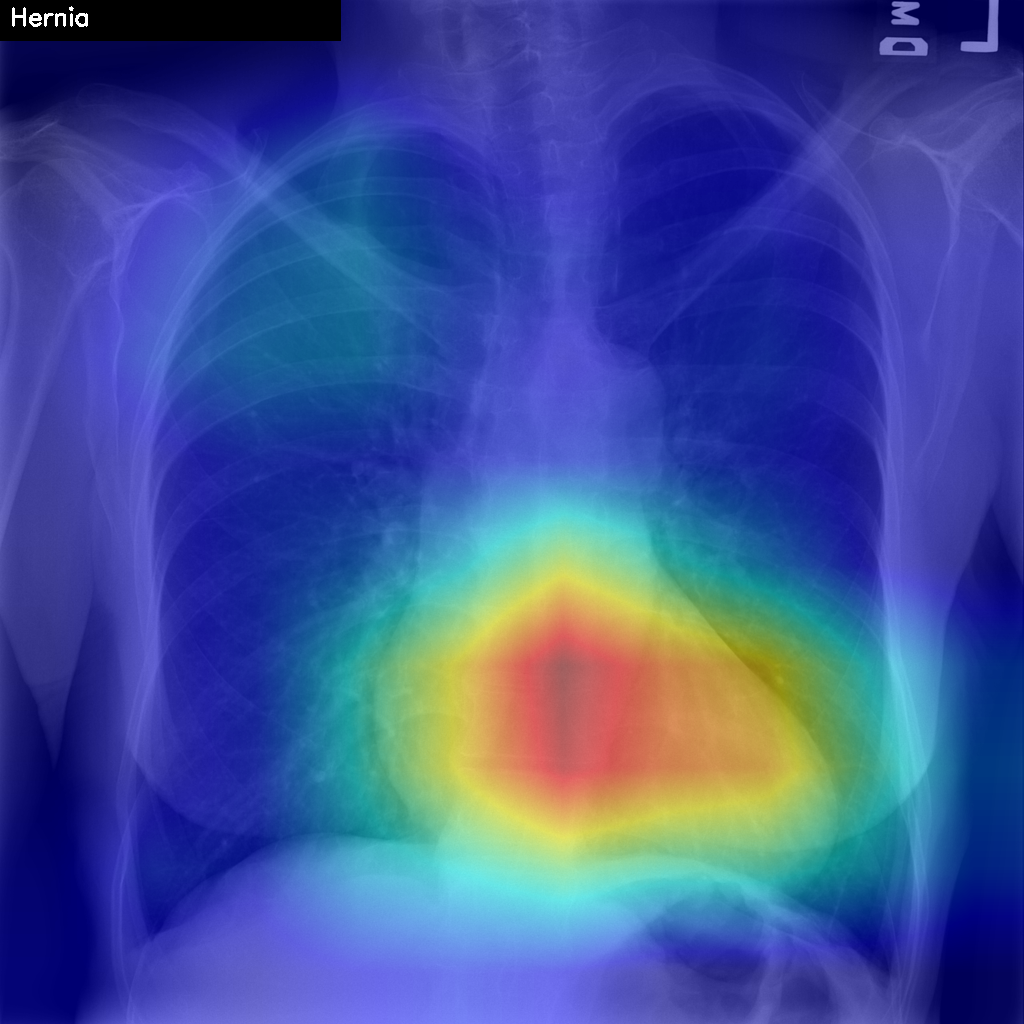

In [ ]:
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)

# Ensure 'label' is a string
label_show = str(labels[i])  # Convert label to string if it's not already

cv2.putText(output, label_show, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

cv2_imshow(output)

In [ ]:
arr = np.array(preds)
ind = np.argpartition(arr[0], -3)[-3:]  # Partition along the second axis
print(ind)
ind_sorted = ind[np.argsort(arr[0][ind])]   # Index into the second axis
print(ind_sorted)

[11  3  0]
[11  0  3]


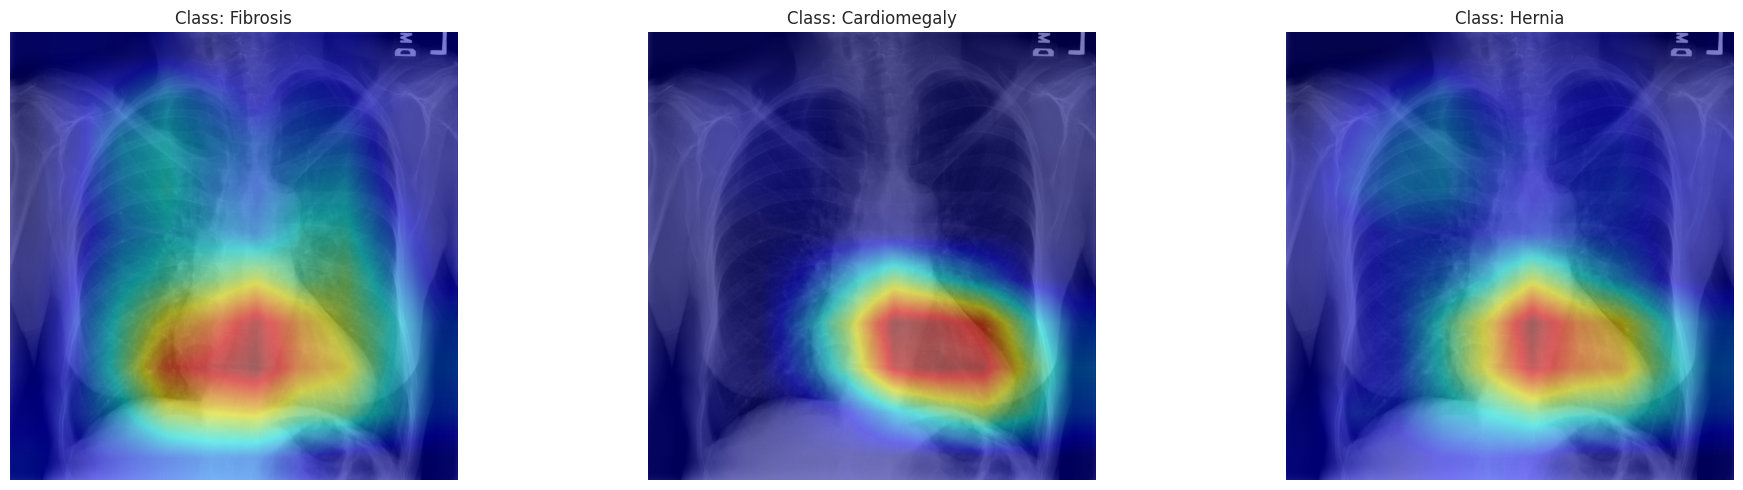

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Create an empty list to store the outputs and their corresponding labels
outputs = []

for i in ind_sorted:
    # Generate the Grad-CAM heatmap for each class
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))

    # Overlay the heatmap on the original image
    (heatmap, output) = overlay_heatmap(heatmap, orig, alpha=0.5)

    # Resize the output if needed (ensure it matches original dimensions)
    output = cv2.resize(output, (orig.shape[1], orig.shape[0]))  # Corrected dimension order

    # Add the output to the list
    outputs.append(output)

# Determine the number of rows and columns for the subplot grid
num_outputs = len(outputs)
cols = 3  # Set the number of columns
rows = (num_outputs + cols - 1) // cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display each image with a title
for idx, output in enumerate(outputs):
    # Display the image on the subplot
    axes[idx].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB

    # Adjust the index for the labels list if necessary
    label_index = ind_sorted[idx]  # Use the index from ind_sorted
    axes[idx].set_title(f"Class: {labels[label_index]}")  # Set the title for each subplot

    axes[idx].axis('off')  # Hide the axis

# Hide any extra subplots that are not used
for idx in range(num_outputs, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

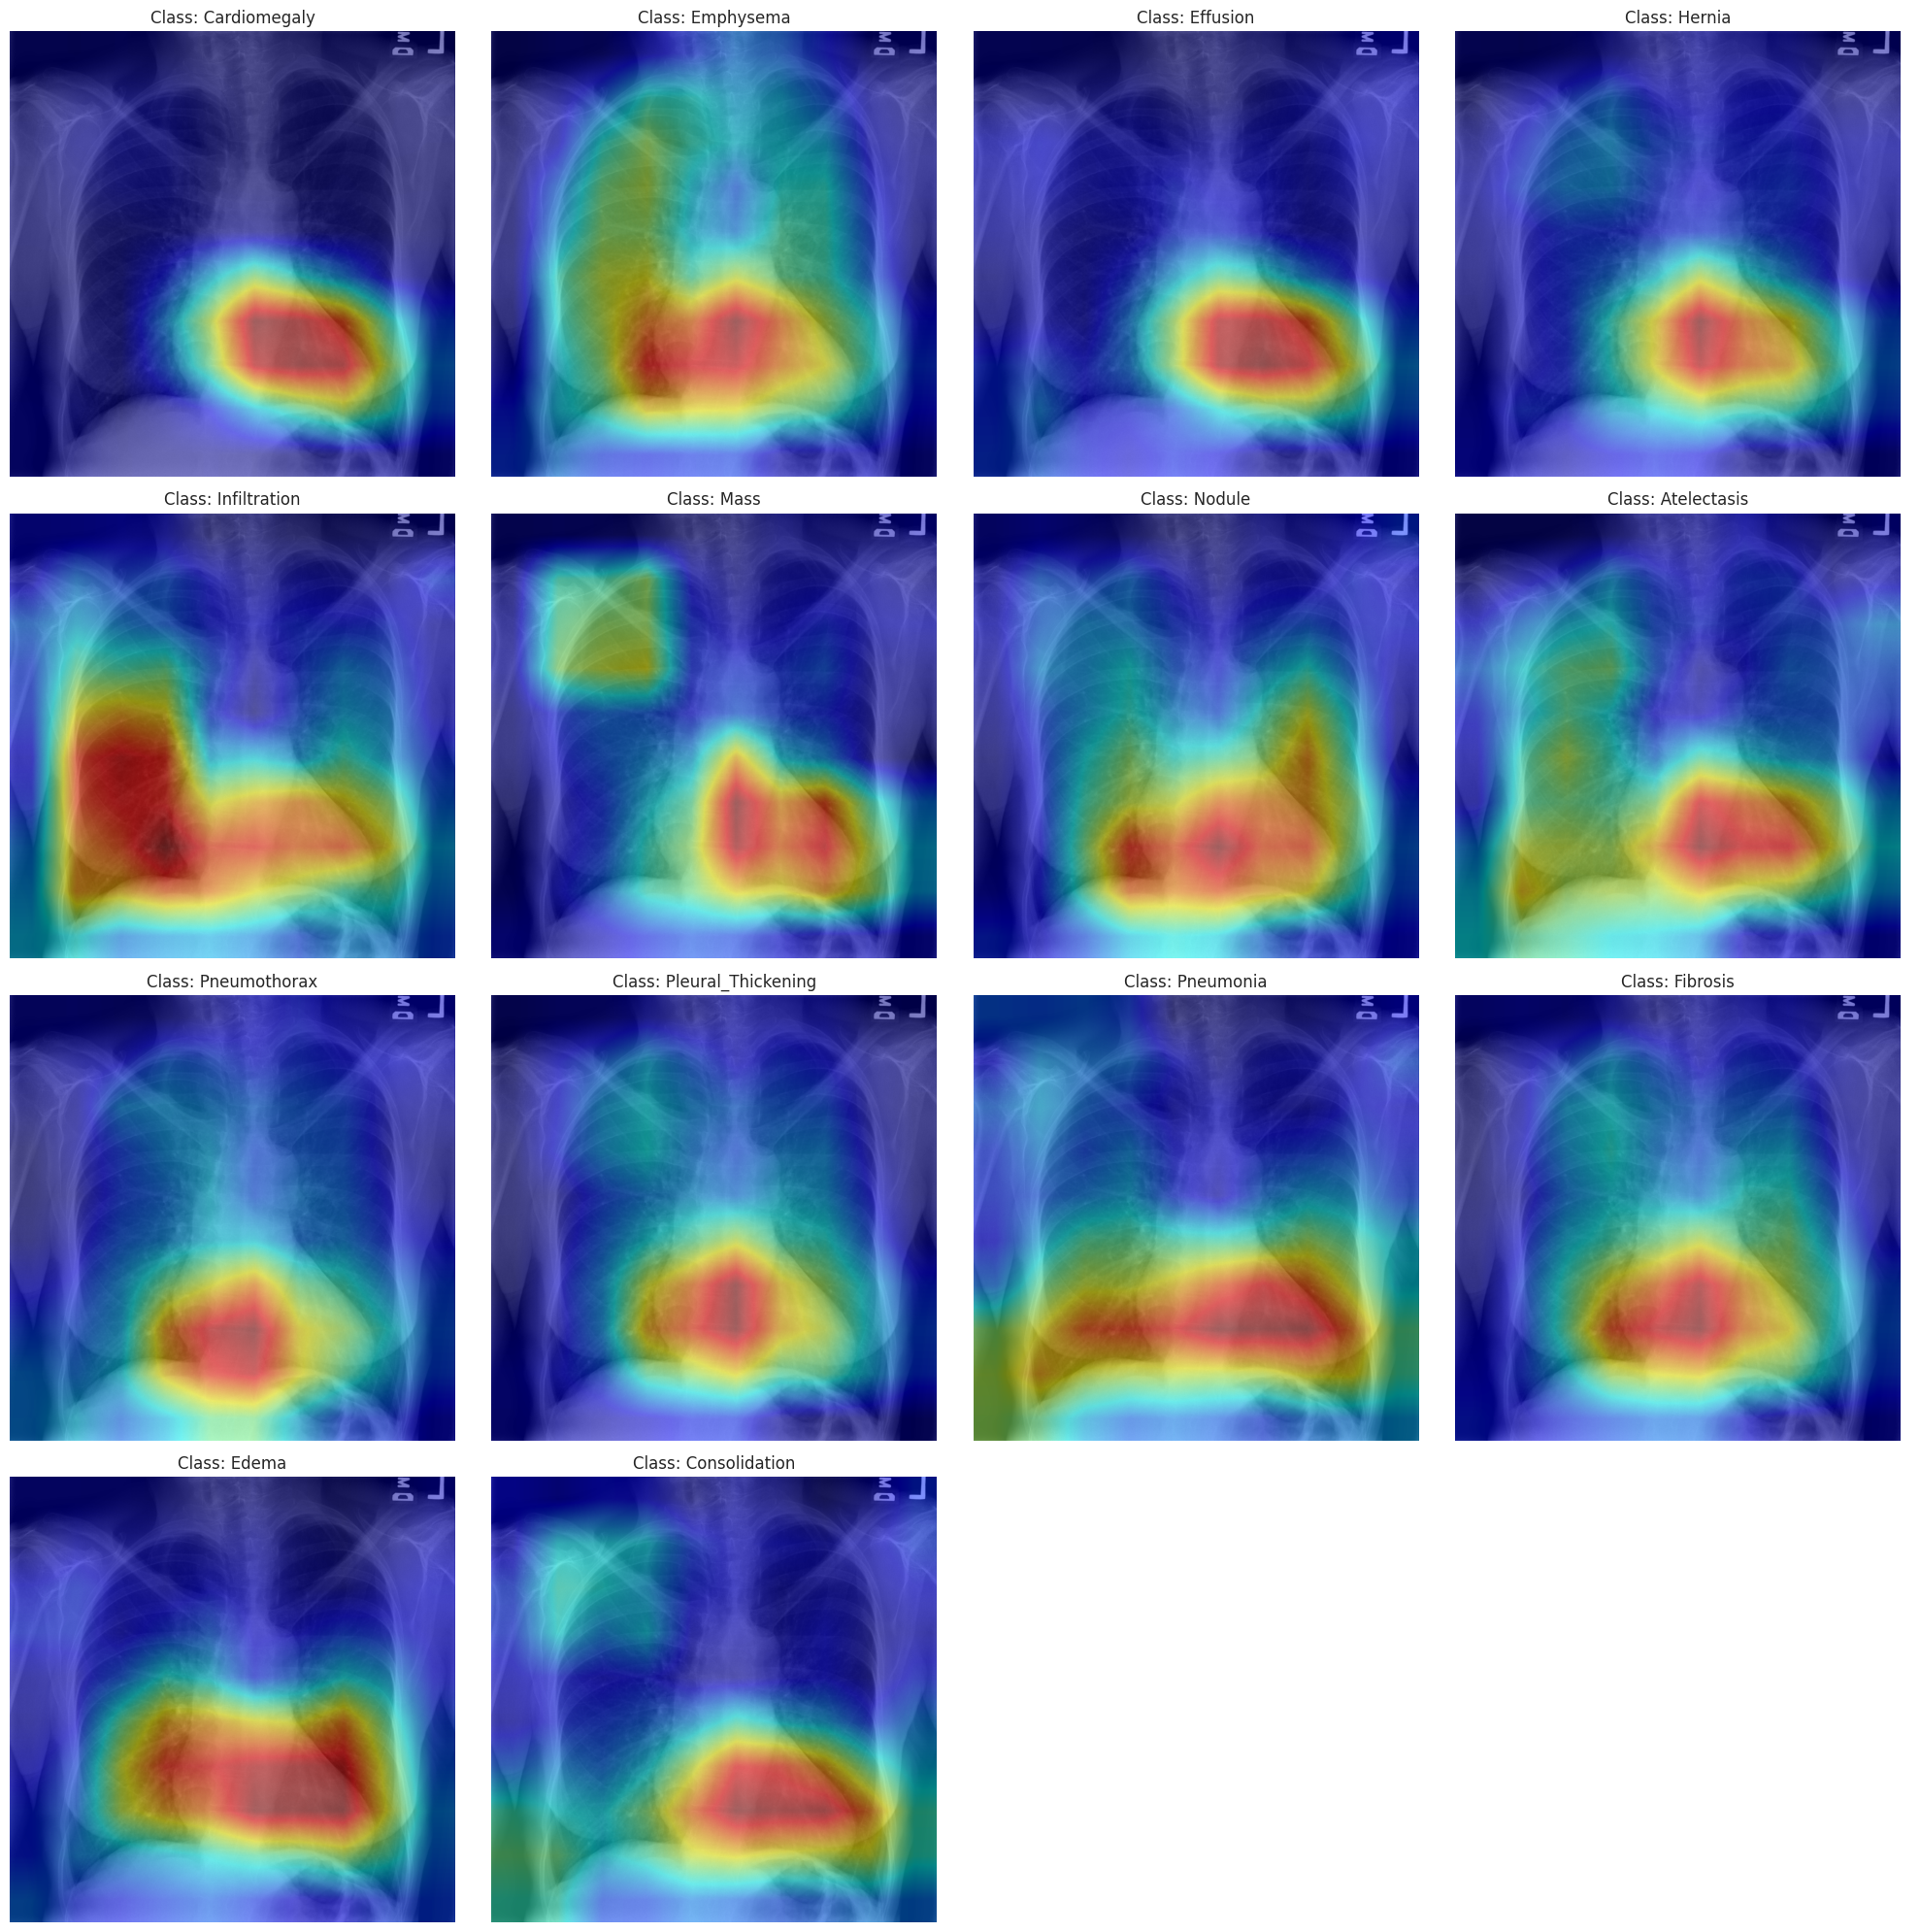

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Create an empty list to store the outputs and their corresponding labels
outputs = []

for i in range(len(labels)):
    # Generate the Grad-CAM heatmap for each class
    cam = GradCAM(model, i)
    heatmap = cam.compute_heatmap(image)

    # Resize the heatmap to match the original image size
    heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))

    # Overlay the heatmap on the original image
    (heatmap, output) = overlay_heatmap(heatmap, orig, alpha=0.5)

    # Resize the output if needed (ensure it matches original dimensions)
    output = cv2.resize(output, (orig.shape[1], orig.shape[0]))  # Corrected dimension order

    # Add the output to the list
    outputs.append(output)

# Determine the number of rows and columns for the subplot grid
num_outputs = len(labels)  # Display heatmaps for all labels
cols = 4  # Set the number of columns
rows = (num_outputs + cols - 1) // cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Display each image with a title
for idx, output in enumerate(outputs):
    # Display the image on the subplot
    axes[idx].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB

    axes[idx].set_title(f"Class: {labels[idx]}")  # Set the title for each subplot

    axes[idx].axis('off')  # Hide the axis

# Hide any extra subplots that are not used
for idx in range(num_outputs, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()